### Import Libraries

In [150]:
import pickle
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import spacy
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import nltk

from nltk.corpus import stopwords
stop = stopwords.words('english')

# import itertools
# import collections
# import unidecode
# import contractions as contract
# import pkg_resources
# from spellchecker import SpellChecker 
# from symspellpy import SymSpell,Verbosity

## Data Explore

In [151]:
df = pd.read_csv('E:\\Collage\\year 3\\S.1.3\\NLP\\suicide detection\\suicide data\\Suicide_Detection.csv')

In [152]:
# drop unmamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [153]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [154]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [155]:
# stem porter to return the word into its root form
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [156]:
# Example
[w for w in tokenizer_porter('a runner likes running and runs a lot') if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

In [157]:
# fillter the data
def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\(|D|P)',text.lower())
    text = re.sub('[\W]+', ' ', text.lower())
    text += ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in tokenizer_porter(text) if w not in stop]
    return tokenized

In [158]:
# label encoder to class columnn 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1


1    116037
0    116037
Name: class, dtype: int64
1    0.5
0    0.5
Name: class, dtype: float64


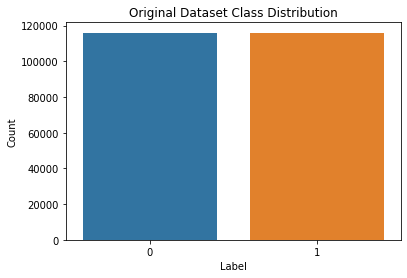

In [159]:
# Check class distribution for balance
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True))

sns.countplot(x=df['class'])
plt.title('Original Dataset Class Distribution')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## Exploratory Data Analysis (EDA)

### we did the EDA and the Data pre processing but it didn't make a significant change in the acuracy so we keeped it hashed

In [160]:
# Check lowercase
# lowercase = df['text'].str.islower()
# print(lowercase.value_counts())

In [161]:
# # Check extra whitespace
# extra_whitespace = df['text'].str.match('\s\s+')
# print(extra_whitespace.value_counts())

In [162]:
# # Check URL
# url = df['text'].str.contains("http")
# print(url.value_counts())

In [163]:
# # Check mentions
# mention = df['text'].str.match('@(\w+)')
# print(mention.value_counts())


In [164]:
# # Check hashtags
# hashtag = df['text'].str.match('#(\w+)')
# print(hashtag.value_counts())

In [165]:
# Check subreddit tag
# subreddit = df['text'].str.match('r/(\w+)')
# print(subreddit.value_counts())

In [166]:
# # Check users tag
# users = df['text'].str.match('u/(\w+)')
# print(users.value_counts())

In [167]:
# Check special characters
# special_characters = df['text'].str.match('[^0-9a-zA-Z]+')
#print(special_characters.value_counts())

In [168]:
# #Remove more stop words and do bigram

# df['without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# from nltk import bigrams
# sentences = [text.split() for text in df['without_stopwords']]

# # Create list of lists containing bigrams in tweets
# terms_bigram = [list(bigrams(text)) for text in sentences]

# # Flatten list of bigrams in clean tweets
# bigrams = list(itertools.chain(*terms_bigram))

# # Create counter of words in clean bigrams
# bigram_counts = collections.Counter(bigrams)

# #Create a table of the top 20 most paired words
# bigram_df = pd.DataFrame(bigram_counts.most_common(20),
#                             columns=['Bigram', 'Count'])

# bigram_df

## Data Preprocessing

In [169]:
# # Defining methods

# vocab = collections.Counter()
# sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
# bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")


# sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
# sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

# # Spell Check using Symspell
# def fix_spelling(text):
#     suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
#     correctedtext = suggestions[0].term # get the first suggestion, otherwise returns original text if nothing is corrected 
#     return correctedtext 

# # Remove some important words from stopwords list 
# deselect_stop_words = ['no', 'not']
    
# for w in deselect_stop_words:
#     nlp.vocab[w].is_stop = False
    
# # Remove extra whitespaces from text
# def remove_whitespace(text):
#     text = text.strip()
#     return " ".join(text.split())

# # Remove accented characters from text, e.g. café
# def remove_accented_chars(text):
#     text = unidecode.unidecode(text)
#     return text

# # Remove URL 
# def remove_url(text):
#     return re.sub(r'http\S+', '', text)

# # Removing symbols and digits
# def remove_symbols_digits(text):
#     return re.sub('[^a-zA-Z\s]', ' ', text)

# # Removing special characters
# def remove_special(text):
#     return text.replace("\r", " ").replace("\n", " ").replace("    ", " ").replace('"', '')

# # Fix word lengthening (characters are wrongly repeated)
# def fix_lengthening(text):
#     pattern = re.compile(r"(.)\1{2,}")
#     return pattern.sub(r"\1\1", text)

# def text_preprocessing(text, accented_chars=True, contractions=True, convert_num=True, 
#                        extra_whitespace=True, lemmatization=True, lowercase=True, 
#                        url=True, symbols_digits=True, special_chars=True, 
#                        stop_words=True, lengthening=True, spelling=True):
#     """preprocess text with default option set to true for all steps"""
#     if accented_chars == True: # remove accented characters
#         text = remove_accented_chars(text)
#     if contractions == True: # expand contractions
#         text = contract.fix(text)
#     if lowercase == True: # convert all characters to lowercase
#         text = text.lower()
#     if url == True: # remove URLs before removing symbols 
#         text = remove_url(text)
#     if symbols_digits == True: # remove symbols and digits
#         text = remove_symbols_digits(text)
#     if special_chars == True: # remove special characters
#         text = remove_special(text)
#     if extra_whitespace == True: # remove extra whitespaces
#         text = remove_whitespace(text)
#     if lengthening == True: # fix word lengthening
#         text = fix_lengthening(text)
#     if spelling == True: # fix spelling
#         text = fix_spelling(text)

### Using the Hashing Vectorizer

In [170]:
# using hashing vectorizer to vectorize the text data 
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', n_features=2**21, 
                         preprocessor=None,tokenizer=tokenizer)

## Split data

In [171]:
X = df['text']
y = df['class']

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Fit and transform the vectorizer on the train set and test set
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

### Building ML Models


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()

log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.933


In [175]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.938


### Testing and making Predictions

In [180]:
label = {0:'negative', 1:'positive'}
example = input("Enter your sentence:") 
list1 = [example]
X = vect.transform(list1 )
print("Prediction:",label[svm.predict(X)[0]])

Prediction: positive


In [177]:
label = {0:'negative', 1:'positive'}
example = ["i will kill my self"]
X = vect.transform(example)
print("Prediction:",label[svm.predict(X)[0]])

Prediction: positive


In [178]:
label = {0:'negative', 1:'positive'}
example = ["It's such a hot day, I'd like to have ice cream and visit the park"]
X = vect.transform(example)
print("Prediction:",label[svm.predict(X)[0]])

Prediction: negative
